## Econometrics - BSc AIDAMS

Prof. Roberto Renò - ESSEC Business School 

## Homework 1

In [2]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders (double check you have this on your pc)
data_in = dirname + "/Data/"
data_out = dirname + "/Data/"
output = dirname + "/output/"
func = dirname + "/Settings/"
sys.path.append(func)

# Import the prewritten helper functions
#from py_helper_functions import *
import warnings

warnings.filterwarnings("ignore")
#print(dirname)

In [3]:
# Import data from your favourite location
df = pd.read_csv(data_in + "wms_da_textbook.csv")

In [4]:
df.loc[lambda x: (x["wave"] == 2014)].country.unique()

array(['United States', 'Germany', 'France', 'Great Britain', 'Greece',
       'Italy', 'Portugal'], dtype=object)

In [5]:
# Sample selection for your homework (part A and B)
df1 = df.loc[
    lambda x: (x["country"] == "France")
    & (x["wave"] == 2014)
]

In [6]:
df1.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0
mean,4652.574468,2014.0,30.524823,2.996740,2.957447,3.509220,2.941489,2.627660,2.921986,2.992908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,128.837951,0.0,5.255720,0.521241,0.864972,0.693428,0.586392,0.523131,0.971530,0.882338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4445.000000,2014.0,20.000000,1.722222,1.000000,1.800000,1.600000,1.666667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4543.000000,2014.0,26.000000,2.611111,2.500000,3.000000,2.400000,2.333333,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4653.000000,2014.0,32.000000,3.055556,3.000000,3.400000,3.000000,2.500000,3.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4739.000000,2014.0,35.000000,3.388889,3.500000,4.000000,3.200000,3.000000,4.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4923.000000,2014.0,39.000000,4.222222,5.000000,5.000000,4.400000,4.166667,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
list(df1)

['firmid',
 'wave',
 'cty',
 'country',
 'sic',
 'management',
 'operations',
 'monitor',
 'target',
 'people',
 'lean1',
 'lean2',
 'perf1',
 'perf2',
 'perf3',
 'perf4',
 'perf5',
 'perf6',
 'perf7',
 'perf8',
 'perf9',
 'perf10',
 'talent1',
 'talent2',
 'talent3',
 'talent4',
 'talent5',
 'talent6',
 'emp_firm',
 'firmage',
 'ownership',
 'mne_yn',
 'mne_cty',
 'competition',
 'export',
 'degree_m',
 'degree_nm',
 'degree_t',
 'i_seniority',
 'reliability',
 'aa_1',
 'aa_2',
 'aa_3',
 'aa_4',
 'aa_5',
 'aa_6',
 'aa_7',
 'aa_8',
 'aa_9',
 'aa_10',
 'aa_11',
 'aa_12',
 'aa_13',
 'aa_14',
 'aa_15',
 'aa_16',
 'aa_17',
 'aa_18',
 'aa_19',
 'aa_20',
 'aa_21',
 'aa_22',
 'aa_23',
 'aa_24',
 'aa_25',
 'aa_26',
 'aa_27',
 'aa_28',
 'aa_29',
 'aa_30',
 'aa_31',
 'aa_32',
 'aa_33',
 'aa_34',
 'aa_35',
 'aa_36',
 'aa_37',
 'aa_38',
 'aa_39',
 'aa_40',
 'aa_41',
 'aa_42',
 'aa_43',
 'aa_44',
 'aa_45',
 'aa_46',
 'aa_47',
 'aa_48',
 'aa_49',
 'aa_50',
 'aa_51',
 'aa_52',
 'aa_53',
 'aa_54',
 'a

## Management Quality and Firm Performance

The data for this case study is from a large-scale research project aiming to fill this gap. The World Management Survey (WMS; http://worldmanagementsurvey.org) collects data on management practices from many firms and other organizations across various industries and countries. This is a major international survey that combines a traditional survey methodology with other methods; see Sections 1.5 and 1.6 below on data collection methods.

The most important variables in the WMS are the management practice “scores.”. Eighteen such scores are in the data, each measuring the quality of management practices in an important area, such as tracking and reviewing performance, the time horizon and breadth of targets, or attracting and retaining human capital. The scores range from 1 through 5, with 1 indicating worst practice and 5 indicating best practice. Importantly, this is the intended content of the variable. The actual content is determined by how it is measured: what information is used to construct the score, where that information comes from, how the scores are constructed from that information, whether there is room for error in that process, and so on.

## Questions 

Part A

We focus on France, 2014 data (parts A-B-C). Management scores are in the column "management". The number of employees is in the column "emp_firm".

1. Display an histogram of the "management" scores. Which theoretical distribution could fit?
2. Compute the sample average and sample standard deviation of the "management" score.
3. Display an histogram of the "number of employees". Which theoretical distribution would fit?
4. Find a transformation of the variable "number of employees" such that its distribution looks like a normal distribution. (hint: the closer your distribution to a Normal distribution, the closer its kurtosis to 3)

Part B: finding associations

We now measure management quality by the "management" variable and firm size by the "emp_firm" variable.

5. Divide the firm size into three quantiles with roughly the same number of observations in the three quantiles. Call these three sets small, intermediate and big firms respectively.
6. Compute the average management score for small, intermediate and big firms.
7. Test if there is a significant difference in management score between big and small firms.
8. Create a scatter plot between firm size and management score.
9. Create a scatter plot between log(firm size) and management score.
10. Compute the correlations between the variables at point 8 and 9. Comment.


Part C: simple regression

11. Consider a linear regression based on the model explaining management score by firm size (point 8). Estimate the linear model using OLS.
12. Repeat the estimate in point 11 now in a model in which management score is explained by log(firm size) (point 9).
13. Compare the R^2 of the two regressions. Explain.

Part D: choose your country/year

14. Repeat the analysis of part C with your favourite country in the most recent year at your disposal. Please make sure you have at least 100 data entries. Are your results consistent with France in 2014? It is ok to expand on this part as much as you want.




## Part A


### Question 1:

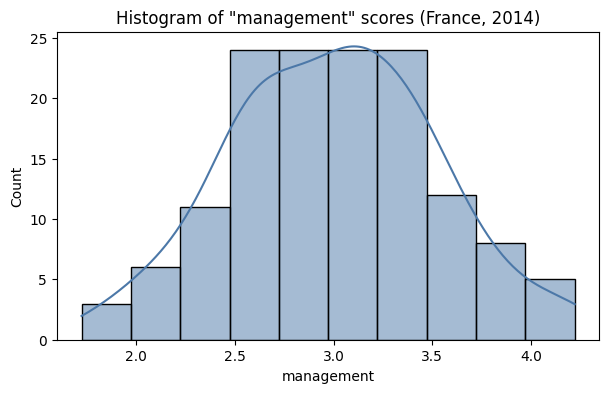

count    141.000000
mean       2.996740
std        0.521241
min        1.722222
25%        2.611111
50%        3.055556
75%        3.388889
max        4.222222
Name: management, dtype: float64
skew = 0.044855749432144286 | kurtosis = 2.7521914753610637


In [8]:
import seaborn as sns

q1 = df.loc[(df["country"] == "France") & (df["wave"] == 2014), "management"].dropna()

plt.figure(figsize=(7,4))
sns.histplot(q1, bins=10, kde=True, color="#4C78A8")
plt.title('Histogram of "management" scores (France, 2014)')
plt.xlabel("management")
plt.ylabel("Count")
plt.show()

print(q1.describe())
print("skew =", q1.skew(), "| kurtosis =", q1.kurt() + 3)

This distribution would most likely fit a Normal distribution due to its (roughly) symmetric bell shape.

### Question 2:

In [9]:
q2 = df.loc[(df["country"] == "France") & (df["wave"] == 2014), "management"].dropna()

sample_mean = q2.mean()
sample_std = q2.std(ddof=1)

print("Sample mean:", sample_mean)
print("Sample std:", sample_std)

Sample mean: 2.99673955829431
Sample std: 0.5212406218028387


### Question 3

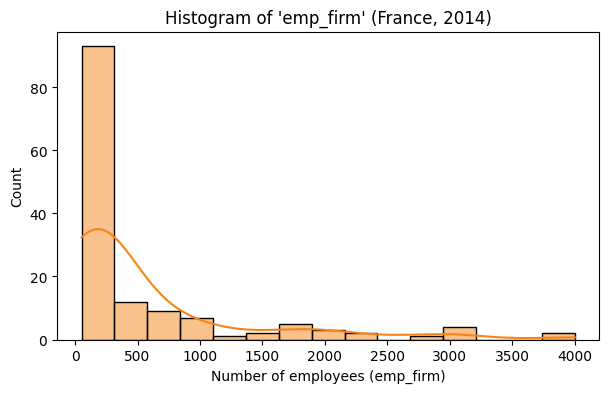

count     141.000000
mean      557.319149
std       813.706514
min        52.000000
25%       105.000000
50%       200.000000
75%       600.000000
max      4000.000000
Name: emp_firm, dtype: float64
skew = 2.3578619628329043 ; kurtosis = 8.359601101882678


In [16]:
x = df.loc[(df["country"] == "France") & (df["wave"] == 2014), "emp_firm"].dropna()

plt.figure(figsize=(7,4))
sns.histplot(x, bins=15, kde=True, color="#F58518")
plt.title("Histogram of 'emp_firm' (France, 2014)")
plt.xlabel("Number of employees (emp_firm)")
plt.ylabel("Count")
plt.show()

print(x.describe())
print("skew =", x.skew(), "; kurtosis =", x.kurt() + 3)

We can observe that the histogram is extremely right-skewed, with a skew of 2.36 (approx). It also has an extremely high kurtosis (8.36). A theoretical distribution that would fit best would most likely be a log-normal disribution (or Pareto?).

### Question 4:

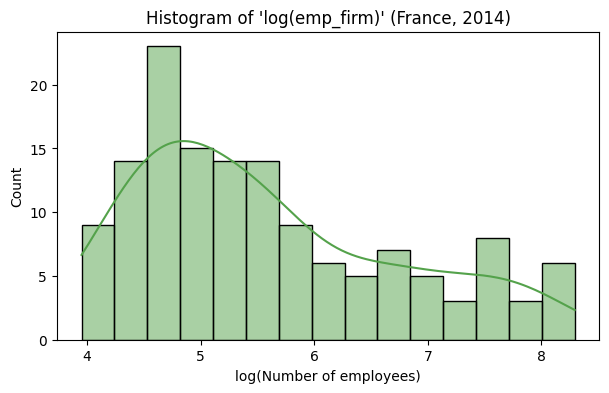

original:   skew = 2.3578619628329043  ; kurtosis = 8.359601101882678
log:   skew = 0.712009191255145  ; kurtosis = 2.4784742222469056


In [18]:
x = df.loc[(df["country"] == "France") & (df["wave"] == 2014), "emp_firm"].dropna()
x_log = np.log(x) #log transform is most likely the most fitting transformation for this

plt.figure(figsize=(7,4))
sns.histplot(x_log, bins=15, kde=True, color="#54A24B")
plt.title("Histogram of 'log(emp_firm)' (France, 2014)")
plt.xlabel("log(Number of employees)")
plt.ylabel("Count")
plt.show()

print("original:   skew =", x.skew(), " ; kurtosis =", x.kurt() + 3)
print("log:   skew =", pd.Series(x_log).skew(), " ; kurtosis =", pd.Series(x_log).kurt() + 3)

We have a more bell-shaped result, with a kurtosis of 2.48 (somewhat close to 3). While we're not exactly at a Normal distribution, we're much closer with the log transformation.

## Part B: Finding Associations

### Question 5:

In [21]:
df_q5 = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm"]].dropna().copy()

df_q5["size_group"] = pd.qcut(
    df_q5["emp_firm"],
    q=3,
    labels=["Small", "Intermediate", "Big"]
)

print(df_q5["size_group"].value_counts().sort_index())
print(df_q5["emp_firm"].quantile([0, 1/3, 2/3, 1]))

size_group
Small           47
Intermediate    47
Big             47
Name: count, dtype: int64
0.000000      52.000000
0.333333     125.666667
0.666667     323.333333
1.000000    4000.000000
Name: emp_firm, dtype: float64


Results: 47 firms for each quartile (small, intermediate & big)

### Question 6:

In [23]:
q6_df = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm", "management"]].dropna().copy()

q6_df["size_group"] = pd.qcut(q6_df["emp_firm"], q=3, labels=["Small", "Intermediate", "Big"])

mean_management_by_group = q6_df.groupby("size_group", observed=False)["management"].mean()
print(mean_management_by_group)

size_group
Small           2.775561
Intermediate    2.910166
Big             3.304492
Name: management, dtype: float64


Just from this, we can make a small observation that seemingly, the bigger the firm, the better management it has (on average)

### Question 7:

In [ ]:
from scipy import stats

q7_df = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm", "management"]].dropna().copy()

q7_df["size_group"] = pd.qcut(q7_df["emp_firm"], q=3, labels=["small", "intermediate", "big"])

small = q7_df.loc[q7_df["size_group"] == "small", "management"]
big = q7_df.loc[q7_df["size_group"] == "big", "management"]

t_stat, p_val = stats.ttest_ind(big, small, equal_var=False)

print("mean_small =", small.mean())
print("mean_big   =", big.mean())
print("diff (big - small) =", big.mean() - small.mean())
print("t-stat =", t_stat)
print("p-value =", p_val)

mean_small = 2.77556145952103
mean_big   = 3.3044917076192
diff (big - small) = 0.5289302480981704
t-stat = 5.0300754054464045
p-value = 2.4432561295661127e-06


We can conclude from this that there is a difference in management quality between small and big firms, as we computed a difference between these two firm sizes to be 0.5 on average in favour of big firms.

### Question 8:

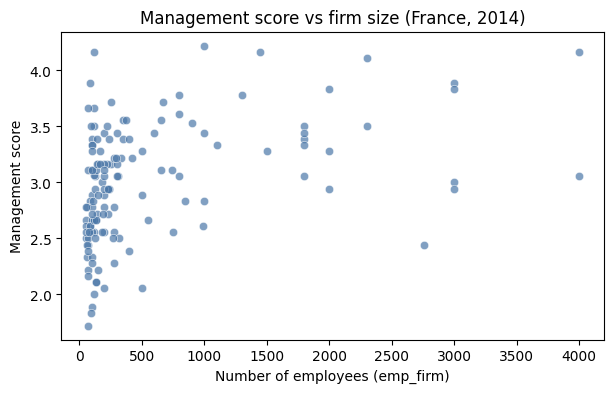

In [25]:
q8_df = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm", "management"]].dropna().copy()

plt.figure(figsize=(7,4))
sns.scatterplot(data=q8_df, x="emp_firm", y="management", alpha=0.7, color="#4C78A8")
plt.title("Management score vs firm size (France, 2014)")
plt.xlabel("Number of employees (emp_firm)")
plt.ylabel("Management score")
plt.show()

### Question 9:

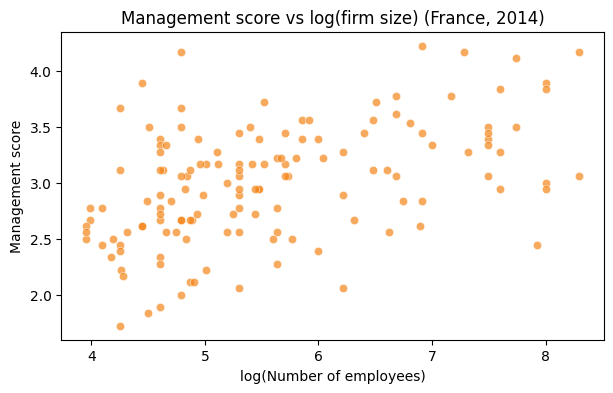

In [26]:
q9_df = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm", "management"]].dropna().copy()

q9_df["log_emp_firm"] = np.log(q9_df["emp_firm"])

plt.figure(figsize=(7,4))
sns.scatterplot(data=q9_df, x="log_emp_firm", y="management", alpha=0.7, color="#F58518")
plt.title("Management score vs log(firm size) (France, 2014)")
plt.xlabel("log(Number of employees)")
plt.ylabel("Management score")
plt.show()

### Question 10:

In [ ]:
q10_df = df.loc[(df["country"] == "France") & (df["wave"] == 2014), ["emp_firm", "management"]].dropna().copy()

corr_raw = q10_df["management"].corr(q10_df["emp_firm"])
corr_log = q10_df["management"].corr(np.log(q10_df["emp_firm"]))

print("Corr(management, emp_firm) =", corr_raw)
print("Corr(management, log(emp_firm)) =", corr_log)

Corr(management, emp_firm) = 0.3898728013137153
Corr(management, log(emp_firm)) = 0.4744034815931034


We observe that both correlations are positive. However, the correlation is slightly stronger for log(emp_firm) which suggests that management quality is more strongly linked with size differences (proportionally).

Concretely, when using the original 'emp_firm' dataframe, a few very large firms (> 4000 employees) dominate the metric, skewing results in their favour. Whereas taking the log of the dataframe compresses the tail, which in turn reduces the amount of bias from outliers and makes the results overall much more linear, which explains the slightly higher positive correlation.


## Part C: Simple Regression

### Question 11: